In [275]:
import pandas as pd
import h5py
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
from pylab import rcParams
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import FactorAnalysis

from sklearn.cluster import DBSCAN
 
rcParams['figure.figsize'] =20,10
rcParams['legend.fontsize'] = 20
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 20}
plt.rc('font', **font)

In [2]:
# constants  #
#------------#
HDF5_dir = "E:\\MessdatenStoeckach\\"
resampled_dir = r'E:\resampled'
dates = os.listdir(HDF5_dir)
phases = ["1","2","3"]

In [3]:
def levels_dbmyA(Aout):
    """ calcs the voltage levels
    / replaces 0 with 1e-3
    / dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV
    / 1V = 120dbmyV
    /dBμV or dBuV (decibel microvolt, amplitude ratio) — absolute voltage in decibels relative to one microvolt, 
    used to measure the signal strength in RF and audio cables. That is dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV. This shows that dBμV is independent of impedance. Since it is the ratio of two voltages, they can be measured as peak-to-peak or RMS and with the same units. Reference voltage 1 μV.
    """
    Aout[Aout<1e-6] = 1e-6
    Aout = Aout/1e-6
    Aout = np.log10(Aout)
    Aout = Aout*20
    return Aout

In [4]:
def levels_dbmyV(Vout):
    """ calcs the voltage levels
    / replaces 0 with 1e-3
    / dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV
    / 1V = 120dbmyV
    /dBμV or dBuV (decibel microvolt, amplitude ratio) — absolute voltage in decibels relative to one microvolt, 
    used to measure the signal strength in RF and audio cables. That is dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV. This shows that dBμV is independent of impedance. Since it is the ratio of two voltages, they can be measured as peak-to-peak or RMS and with the same units. Reference voltage 1 μV.
    """
    Vout = Vout*230
    Vout[Vout<1e-6] = 1e-6
    Vout = Vout/1e-6
    Vout = np.log10(Vout)
    Vout = Vout*20
    return Vout

In [5]:
def generateXAxisData():
    return np.linspace(2000, 149950, 2960)

In [198]:
datelist = ["2017-05-04"]

In [169]:
sh_u_all = pd.DataFrame()
sh_i_all = pd.DataFrame()
sh_u_outliers_all = pd.DataFrame()
sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    #sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_mean.p"), ignore_index=True)
    #sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    #sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [170]:
model = PCA()

In [174]:
sh_i_all = sh_i_all.dropna()

In [175]:
trans = model.fit_transform(sh_i_all)

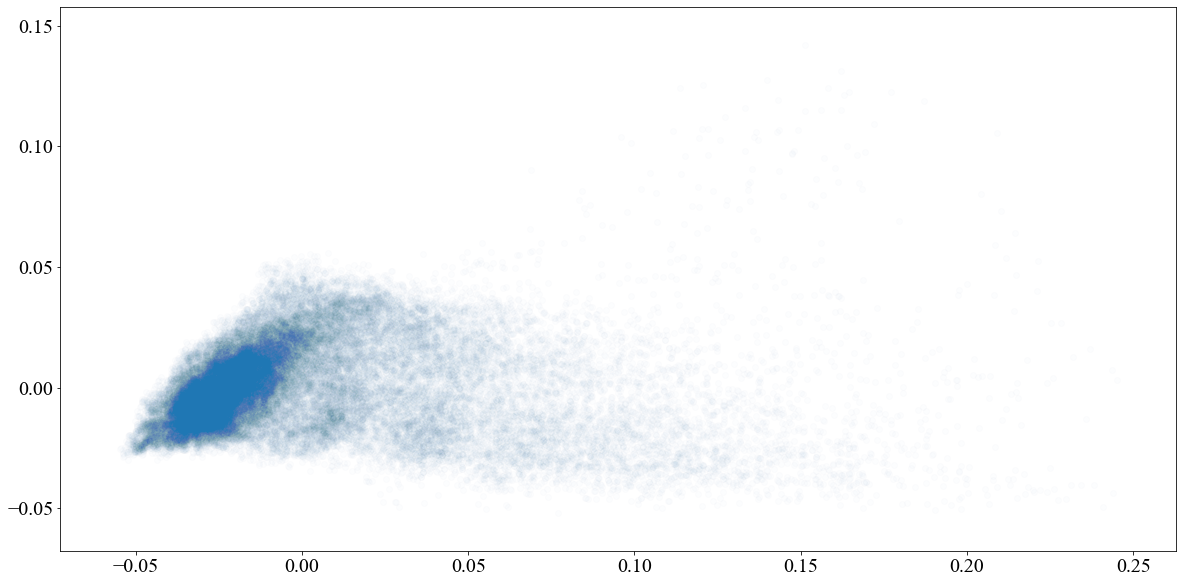

In [186]:
plt.scatter(trans[:,0], trans[:,1], alpha=0.01)
plt.show()

In [199]:
sh_u_all = pd.DataFrame()
sh_i_all = pd.DataFrame()
sh_u_outliers_all = pd.DataFrame()
sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    #sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_mean.p"), ignore_index=True)
    #sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [200]:
allData = pd.concat([sh_i_all, sh_i_outliers_all], axis=1)

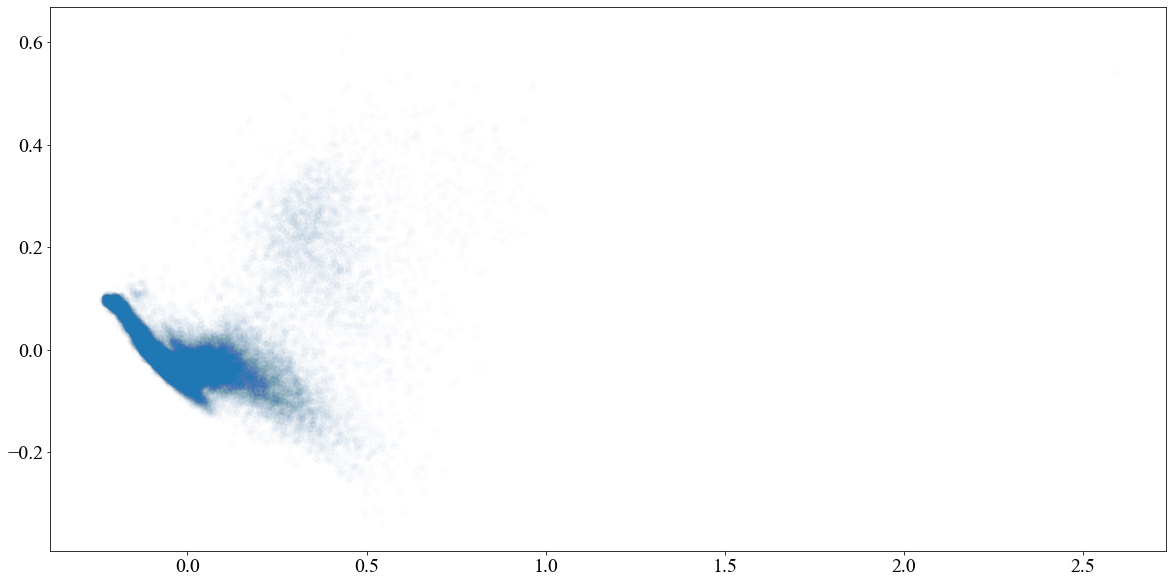

In [194]:
model = PCA()
allData = allData.dropna()
trans = model.fit_transform(allData)
plt.scatter(trans[:,0], trans[:,1], alpha=0.01)
plt.show()

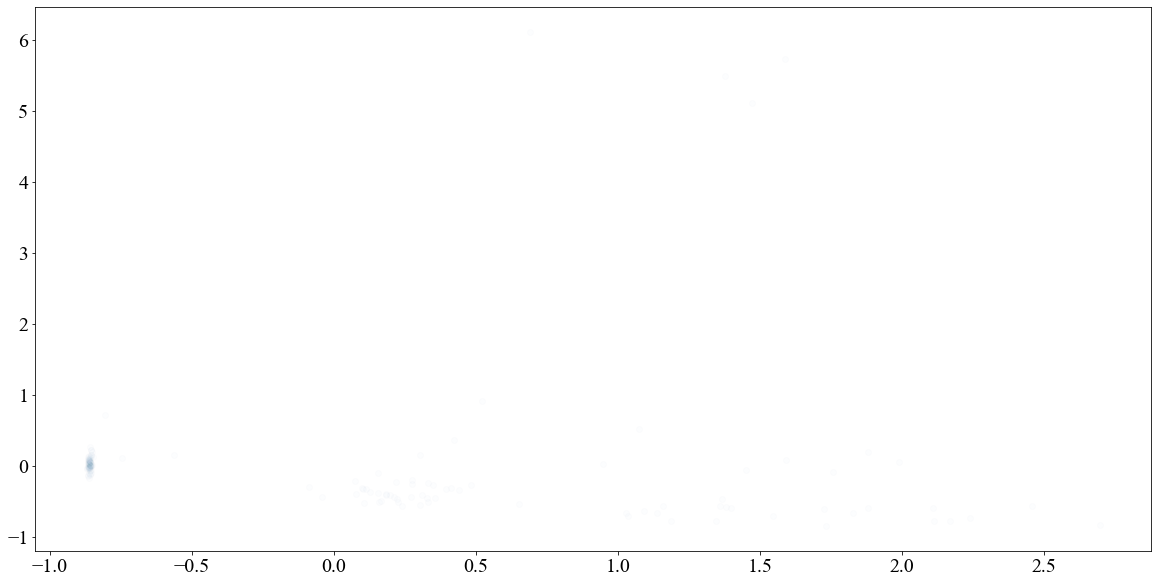

In [202]:
transformer = FactorAnalysis(n_components=2)
trans = transformer.fit_transform(allData)
plt.scatter(trans[:,0], trans[:,1], alpha=0.01)
plt.show()

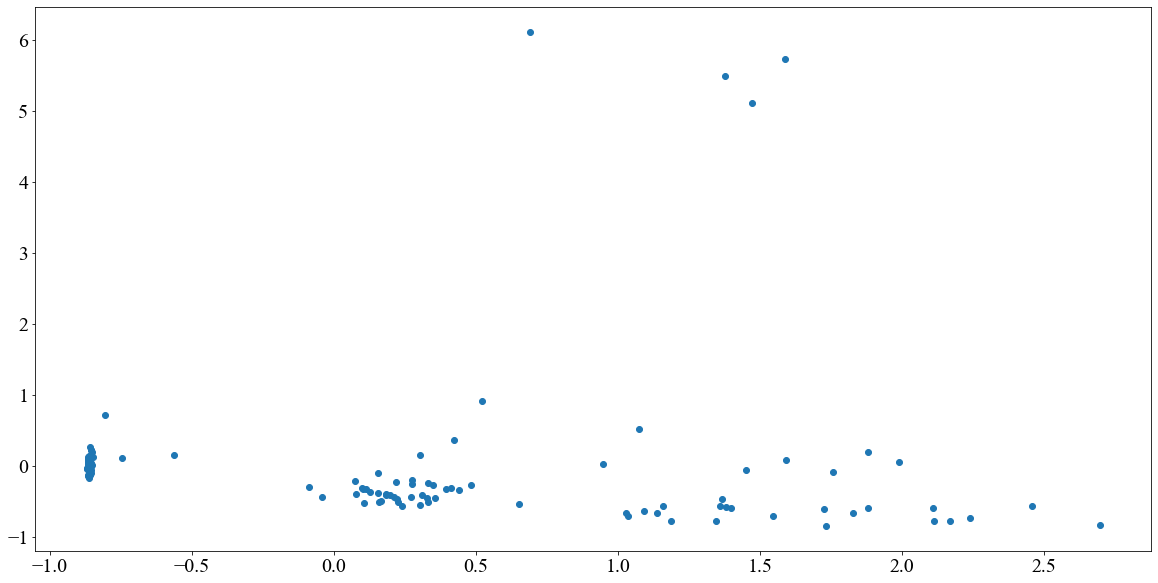

In [203]:
plt.scatter(trans[:,0], trans[:,1])
plt.show()

In [207]:
clustering = SpectralClustering(n_clusters=4, assign_labels="discretize", random_state=0).fit(trans)

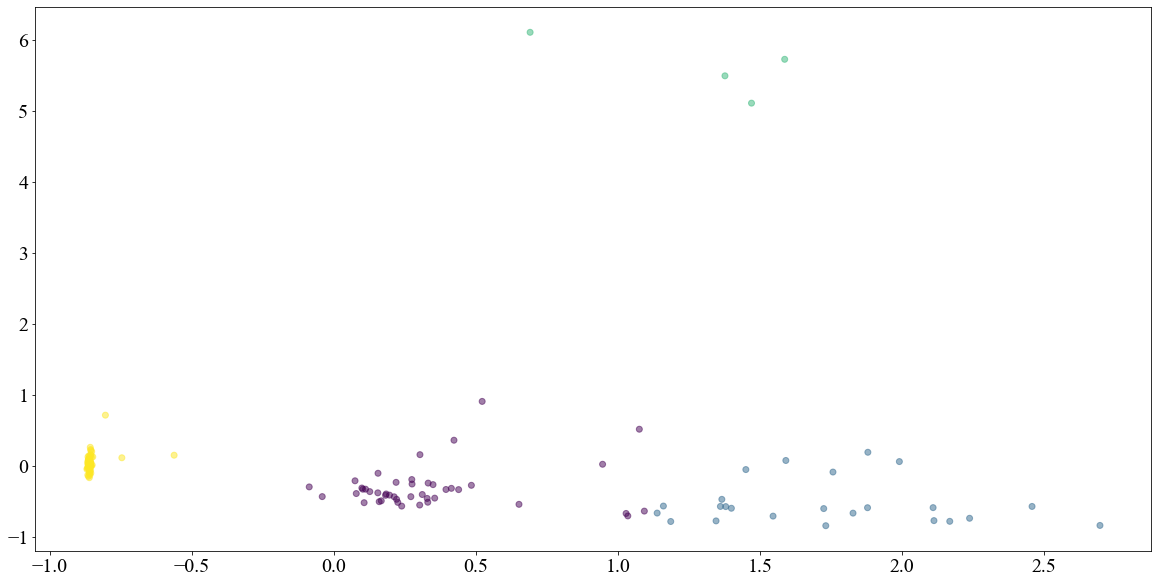

In [281]:
plt.scatter(trans[:,0], trans[:,1], c=clustering.labels_, alpha=0.5)
plt.show()

In [262]:
trans[49]

array([ 0.2251537 , -0.50753619])

In [263]:
colorList = list()

In [217]:
clustering.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 3, 3, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [264]:
for i in clustering.labels_:
    if i == 0:
        colorList.append('purple')
    if i == 1:
        colorList.append('blue')
    if i == 2:
        colorList.append('green')
    if i == 3:
        colorList.append('yellow')

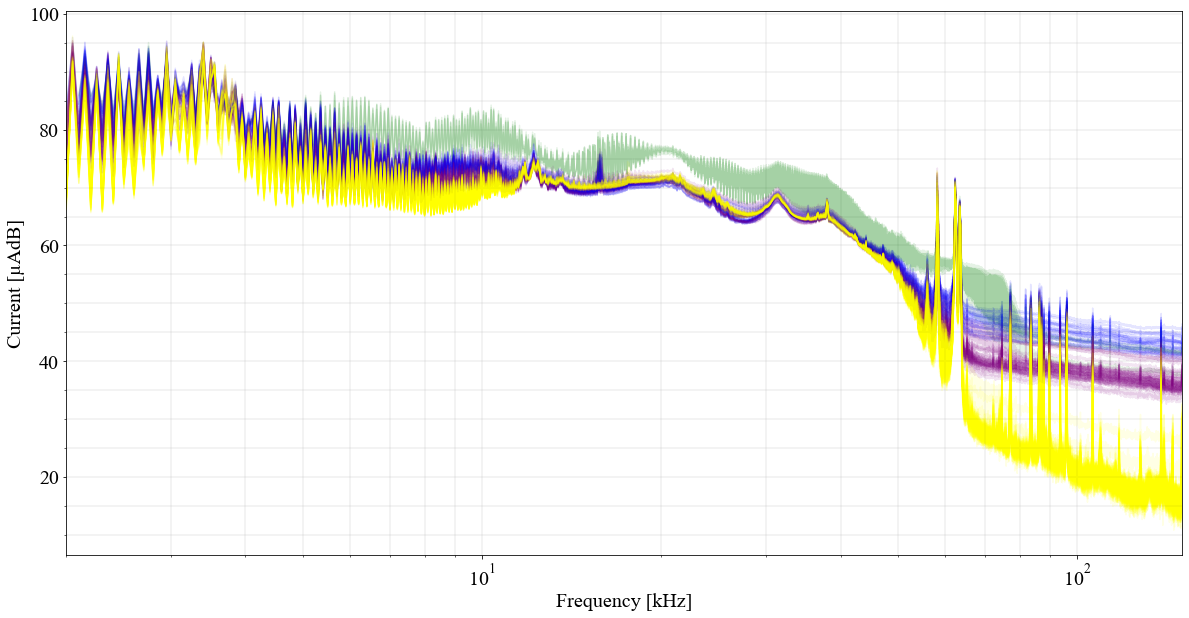

In [280]:
x = generateXAxisData()/1000

sh_i_db = levels_dbmyA(sh_i_all)

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
for idx,sh in sh_i_db.iterrows():
    ax.plot(x, sh, c=colorList[idx], alpha=0.1)

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [µAdB]')
ax.set_xscale('log')

In [282]:
datelist = pd.date_range(start="2017-04-01", end="2017-06-30").strftime("%Y-%m-%d").astype(str).to_list()

In [283]:
sh_u_all = pd.DataFrame()
sh_i_all = pd.DataFrame()
sh_u_outliers_all = pd.DataFrame()
sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    #sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_mean.p"), ignore_index=True)
    #sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    #sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [284]:
sh_i_all = sh_i_all.dropna()

In [288]:
transformer = FactorAnalysis(n_components=2)
trans = transformer.fit_transform(sh_i_all)

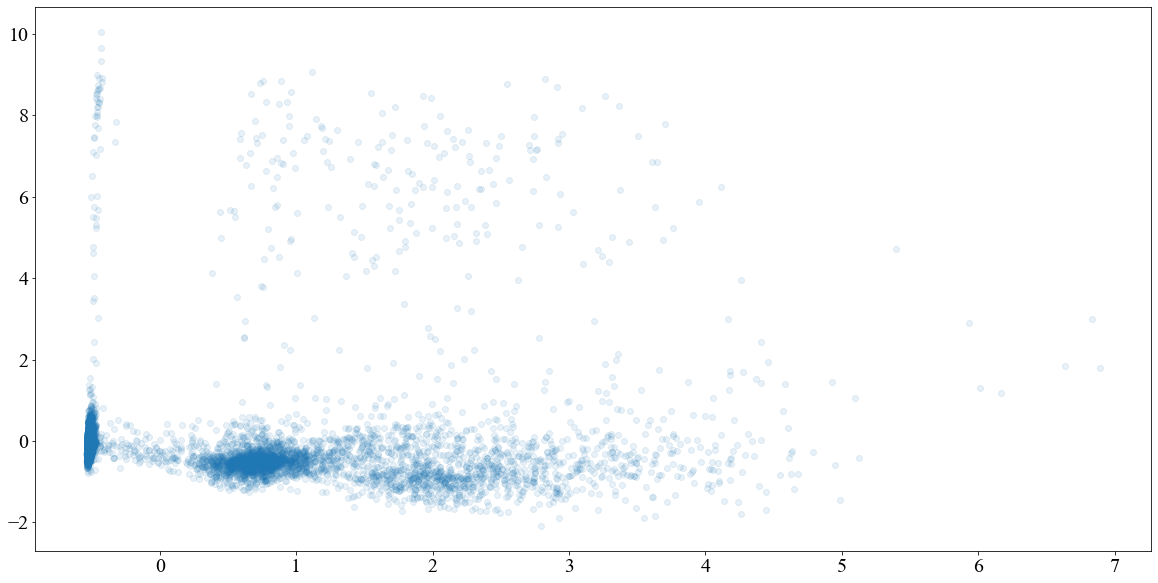

In [289]:
plt.scatter(trans[:,0], trans[:,1], alpha=0.1)
plt.show()

In [290]:
clustering = SpectralClustering(n_clusters=4, assign_labels="discretize", random_state=0).fit(trans)

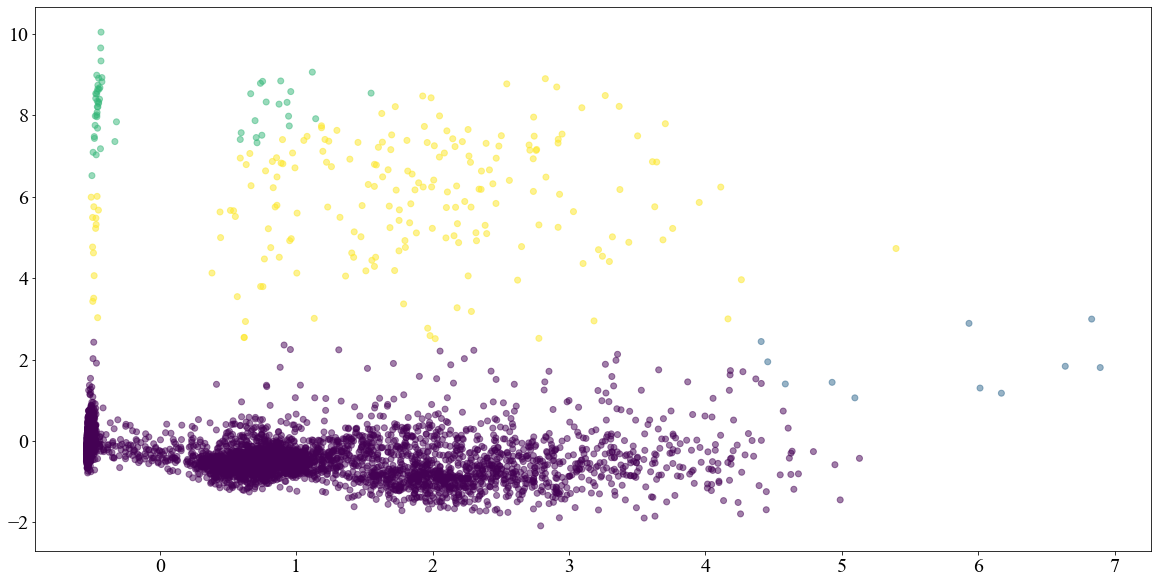

In [291]:
plt.scatter(trans[:,0], trans[:,1], c=clustering.labels_, alpha=0.5)
plt.show()

In [292]:
colorList = list()
for i in clustering.labels_:
    if i == 0:
        colorList.append('purple')
    if i == 1:
        colorList.append('blue')
    if i == 2:
        colorList.append('green')
    if i == 3:
        colorList.append('yellow')

KeyboardInterrupt: 

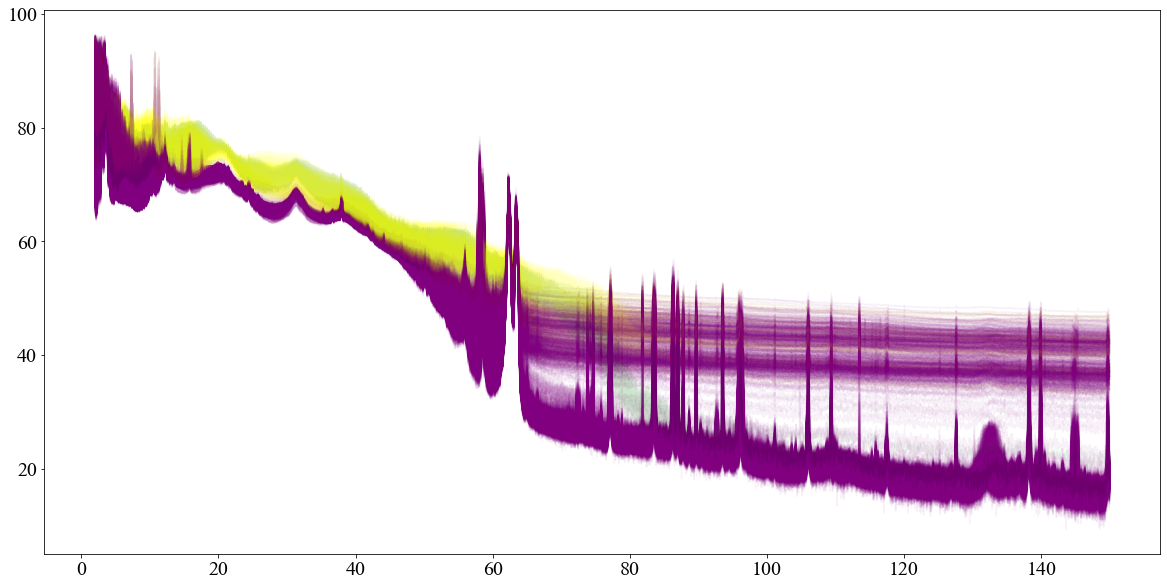

In [294]:
x = generateXAxisData()/1000

sh_i_db = levels_dbmyA(sh_i_all)

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
for idx,sh in sh_i_db.iterrows():
    ax.plot(x, sh, c=colorList[idx], alpha=0.05)

ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [µAdB]')
ax.set_xscale('log')